# Computational Modeling of Face Acts in Persuasion Oriented Discussions

**Description:** The notion of face refers to the public self-
image of an individual that emerges both from the individual’s own actions as well as from the interaction with others. Modeling face and understanding its state changes throughout a conversation is critical to the study of maintenance of basic human needs in and through interaction.

we propose a generalized framework for modeling face acts in persuasion conversations, resulting in a reliable coding manual, an annotated corpus, and
computational models. The framework reveals insights about differences in face act utilization between asymmetric roles in persuasion conversations. Using computational models,we are trying to identify face acts as well as predict a key conversational outcome(e.g. donation success).


* Working with DeBERTa - Known for high performance on various NLP benchmarks, DeBERTa uses disentangled attention and enhanced representations. It's effective for more nuanced intent detection tasks.


# Data Description
We use the pre-existing persuasion corpus of Wang et al. (2019). Each conversation comprises a series of exchanges where the persuader (ER) has to
convince the persuadee (EE) to donate a part of their task earnings to the charity, Save the Children.This selected corpus is well-situated for our task
since each conversation is guaranteed to have a potential face threat (i.e., a request for money) and hence, we can expect face act exchanges between
the two participants.

In a two-party conversation, a face act can either raise (+) or attack (-) the positive face (Pos) or negative face (Neg) of either the speaker (S) or the hearer (H), leading to 8 possible different outcomes. For example, HPos+ means raising the positive face of the hearer. We provide a generalized framework below for labelling a speech act / utterance with one or more face acts, building upon the politeness theory of Brown and Levinson
(1978).The framework is designed to be explicit enough to ensure the creation of a reliable coding manual for classifying face-acts, as opposed to the simple classification of requests and other directives as intrinsic FTAs (Brown and Levinson,1978). Moreover, since we also seek to operationalize FSA, we make some departure from the original classification of directives. For example, we feel that compliments directed at the hearer, should be HPos+ rather than HNeg- (as observed in Brown et al. (1987)) since an appreciation for someone’s
efforts is more desirable.

| Face Act  | Description |
|-----------|-------------|
| **SPos+ (i)**  | S posit that they are virtuous in some aspects or they are good. |
| **SPos+ (ii)** | S compliment the brand or item they represent or endorse and thus project their credibility. |
| **SPos+ (iii)** | S state their preference or want, something that they like or value. |
| **SPos- (i)** | S confess or apologize for being unable to do something that is expected of them. |
| **SPos- (ii)** | S criticize or humiliate themselves. They damage their reputation or values by either saying they are not so virtuous or criticize some aspect of the brand/item they endorse or support. |
| **HPos+ (i)** | S compliment H either for H’s virtues, efforts, likes or desires. It also extends to S acknowledging the efforts of H and showing support for H. |
| **HPos+ (ii)** | S can also provide an implicit compliment to incentivize H to do something good. |
| **HPos+ (iii)** | S empathize / sympathize or in general agree with H. |
| **HPos+ (iv)** | S is willing to do the FTA as imposed by H (implying that the FTA is agreeable to S). |
| **HPos- (i)** | S voice doubts or criticize H or the product/brand that H endorses. |
| **HPos- (ii)** | S disagree with H over some stance, basically contradicting their viewpoint. |
| **HPos- (iii)** | S is either unaware or indifferent to H’s wants or preferences. |
| **SNeg+ (i)** | S reject or are unwilling to do the FTA. Stating the reason does not change the circumstances of non-compliance but sometimes helps to mitigate the face act. |
| **SNeg- (i)** | S offer to assist H. |
| **HNeg+ (i)** | S seek to decrease the imposition of the FTA on H by either decreasing the inconvenience such as providing alternate, simpler ways to carry out the FTA or decrease the threat associated with the FTA. |
| **HNeg+ (ii)** | S apologize for the FTA to show that S understood the inconvenience of imposing the request but they have to request nevertheless. |
| **HNeg- (i)** | S impose an FTA on the H. The FTA is some act which H would not have done on their own. |
| **HNeg- (ii)** | S increase the threat or ranking of the FTA. |
| **HNeg- (iii)** | S ask/request H for assistance. |


### 1. Setup

Lets get all our libraries and download and process our data.

In [1]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.1 MB/s eta 0:00:00


In [3]:
!pip install -q transformers

In [4]:
!pip install tensorflow==2.15.0 --quiet #15 13
!pip install tf_keras==2.15.0 --quiet
!pip install tensorflow-text==2.15.0 --quiet #15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorstore 0.1.69 requires ml-dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.15.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 45.4 MB/s eta 0:00:00


In [5]:
!pip install pyarrow==14.0.2 --quiet
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 10.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.1.0 requires pyarrow>=15.0.0, but you have pyarrow 14.0.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 13.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 18.1.0 which is incompatible.
pylibcudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 18.1.0 which is incompatible.


In [6]:
!pip install pydot

In [7]:
!pip install -U scikit-learn

In [8]:
from datasets import load_dataset

In [48]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
from datasets import Dataset
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import tensorflow as tf
from transformers import TFGPT2ForSequenceClassification, GPT2Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from collections import Counter
from tensorflow import keras
from sklearn.utils import shuffle
import seaborn as sns
from pprint import pprint
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification
from transformers import BertTokenizer, TFBertModel, TFAutoModel
from transformers import TFDebertaV2ForSequenceClassification
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
from transformers import DistilBertTokenizer, TFDistilBertModel
import os
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import time


We're going to use the 20 newsgroups dataset as it is ideal for exploring multiclass classification.  It includes posts from 20 different newsgroups.  Our task will be to correctly label a post with it's group.  We'll download a version available from Hugging Face.

### 2. Load the Dataset

In [10]:
# GitHub raw URL
url = 'https://raw.githubusercontent.com/ShoRit/face-acts/master/data/Persuasion%20Face%20Act%20Prediction.xlsx'

# Load the Excel file
ds = pd.read_excel(url, engine='openpyxl')

# Step 2: Select the desired columns
ds = ds[['conversation_id', 'speaker', 'utterance', 'true_face']]

# Map speaker values to labels using .loc to avoid SettingWithCopyWarning
ds.loc[:, 'speaker'] = ds['speaker'].map({0: 'ER', 1: 'EE'})


# Display the new DataFrame with selected columns
print(ds.head(5))



   conversation_id speaker                                          utterance  \
0              120      ER                                                Hi!   
1              120      ER  Have you heard of an organization called Save ...   
2              120      EE  I think I have once before, in a grocery store...   
3              120      ER  Do you mind if i give you a little information...   
4              120      EE                                     Sure, go ahead   

  true_face  
0     other  
1     other  
2     hpos+  
3     hneg-  
4     hpos+  


<ipython-input-10-9c328697f2d7>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['ER' 'ER' 'EE' ... 'EE' 'ER' 'EE']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ds.loc[:, 'speaker'] = ds['speaker'].map({0: 'ER', 1: 'EE'})


Take a look at the records.  We basically have a Conversation_id, speaker with binary values of 0 and 1 representing a EE and ER , Persuadee and persuader for "Save the Children" charity donation. Utterence by the EE/ER and the true_face which we will use in the model for multi-classification into the above 7 classes.

Take a look at the sample record:
* Identifier: Unique identifier for the conversation.

* Speaker: The speaker refers to the individual delivering the utterance, which can be a participant in the conversation, such as ER or EE. ER acts as the Persuader, attempting to convince EE, the Persuadee, to contribute to the charity program "Save the Children."

* Utterance: The spoken or written statement made by the speaker. This reflects their thoughts, feelings, or intentions.

* True Face: A classification that captures the underlying intent or emotional state of the speaker. It may indicate positive or negative aspects of their communication, categorized into different labels (e.g., HPos+, HPos-, SPos+, SPos-).


## 2.1 Identify unique speaker and true_face values in the dataset


In [11]:
# Initialize a dictionary to store unique true_faces for each speaker
speaker_true_faces = defaultdict(set)

# Iterate through the DataFrame to collect unique true_faces for each speaker
for index, row in ds.iterrows():  # Using iterrows() to get each row
    speaker = row['speaker']
    true_face = row['true_face']

    # Add the true_face to the set for the corresponding speaker
    speaker_true_faces[speaker].add(true_face)

# Convert the sets to lists for better readability
speaker_true_faces = {speaker: list(true_faces) for speaker, true_faces in speaker_true_faces.items()}

# Create a DataFrame to view unique speakers and their unique true_faces
unique_speakers_df = pd.DataFrame({
    'Speaker': speaker_true_faces.keys(),
    'Unique True Faces': [true_faces for true_faces in speaker_true_faces.values()]
})

# Display the DataFrame
print(unique_speakers_df)

  Speaker                                  Unique True Faces
0      ER         [spos+, hpos+, hpos-, hneg+, other, hneg-]
1      EE  [spos+, spos-, hpos+, hpos-, other, sneg+, hneg-]


## Observations

* ER lacks the spos- expression, which is indeed significant. Since ER represents the charity, it is logical that they wouldn’t express negative sentiments towards the organization they are promoting. Criticism would be counterproductive in a persuasive context where the goal is to encourage the EE to donate.

* Diversity in Expression: This difference may indicate that EE is capable of conveying a greater variety of emotional states including criticism towards charity.

* Model Training: If we are using this data, having more unique expressions for one speaker could affect how a model learns to recognize and classify emotions, possibly leading to more robust outcomes for EE.

* Next Steps : Modelling the BERT model for ER and EE separately as EE has one additional emotional variance as compared to EE.


### 2.2 Split the dataset into ER and EE datasets

In [12]:
# Split the DataFrame into ER and EE datasets
ER_dataset = ds[ds['speaker'] == 'ER']
EE_dataset = ds[ds['speaker'] == 'EE']

# Display the first 5 rows of each dataset
print("ER Dataset:")
print(ER_dataset.head(5))

print("\nEE Dataset:")
print(EE_dataset.head(5))

ER Dataset:
   conversation_id speaker                                          utterance  \
0              120      ER                                                Hi!   
1              120      ER  Have you heard of an organization called Save ...   
3              120      ER  Do you mind if i give you a little information...   
5              120      ER  Just some ver basic info, Save the Children is...   
7              120      ER                                      Yes they are!   

  true_face  
0     other  
1     other  
3     hneg-  
5     spos+  
7     other  

EE Dataset:
    conversation_id speaker  \
2               120      EE   
4               120      EE   
6               120      EE   
13              120      EE   
14              120      EE   

                                            utterance true_face  
2   I think I have once before, in a grocery store...     hpos+  
4                                      Sure, go ahead     hpos+  
6                 A

## 2.2 Format the ER dataset to train the model

In [13]:
# Function to clean dialogue
def clean_dialogue(dialogue):
    if isinstance(dialogue, str):  # Ensure the input is a string
        # Lowercase
        dialogue = dialogue.lower()
        # Remove punctuation
        dialogue = re.sub(r'[^\w\s]', '', dialogue)
        # Strip whitespace
        dialogue = dialogue.strip()
        return dialogue
    else:
        return ""  # Return an empty string or handle as you prefer

cleaned_data = []
ER_formatted_ds = []
true_face_labels = set()  # To collect unique true_face labels

# Use iterrows() to iterate through the DataFrame
for index, row in ER_dataset.iterrows():
    speaker = row['speaker']
    utterance = row['utterance']
    true_face = row['true_face']

    # Clean the utterance
    cleaned_utterance = clean_dialogue(utterance)

    # Collect unique true_face labels
    true_face_labels.add(true_face)

    # Append the speaker and cleaned utterance to the formatted data
    ER_formatted_ds.append({
        'speaker': f"{speaker}",
        'dialogue': cleaned_utterance,  # Store cleaned dialogue
        'true_face': true_face  # Keep original true_face for now
    })

# Create a mapping from true_face labels to IDs
sorted_labels = sorted(label for label in true_face_labels)

# Create a mapping from sorted labels to IDs
true_face_to_id = {label: idx for idx, label in enumerate(sorted_labels)}

# Create a new Dataset from the formatted data and convert labels to IDs
ER_formatted_ds = Dataset.from_dict({
    'speaker': [entry['speaker'] for entry in ER_formatted_ds],
    'dialogue': [entry['dialogue'] for entry in ER_formatted_ds],
    'true_face_id': [true_face_to_id[entry['true_face']] for entry in ER_formatted_ds],  # Converts true_face to ID
    'true_face': [entry['true_face'] for entry in ER_formatted_ds]  # Keeps the original true_face
})

# Display first 100 entries of the formatted dataset
print(ER_formatted_ds[:5])
# Print the mapping of true_face labels to IDs
print(true_face_to_id)


{'speaker': ['ER', 'ER', 'ER', 'ER', 'ER'], 'dialogue': ['hi', 'have you heard of an organization called save the children', 'do you mind if i give you a little information about them', 'just some ver basic info save the children is an international nongovernmental organization that promotes childrens rights provides relief and helps support children in developing countries', 'yes they are'], 'true_face_id': [4, 4, 1, 5, 4], 'true_face': ['other', 'other', 'hneg-', 'spos+', 'other']}
{'hneg+': 0, 'hneg-': 1, 'hpos+': 2, 'hpos-': 3, 'other': 4, 'spos+': 5}


### 3. Explore the ER Dataset

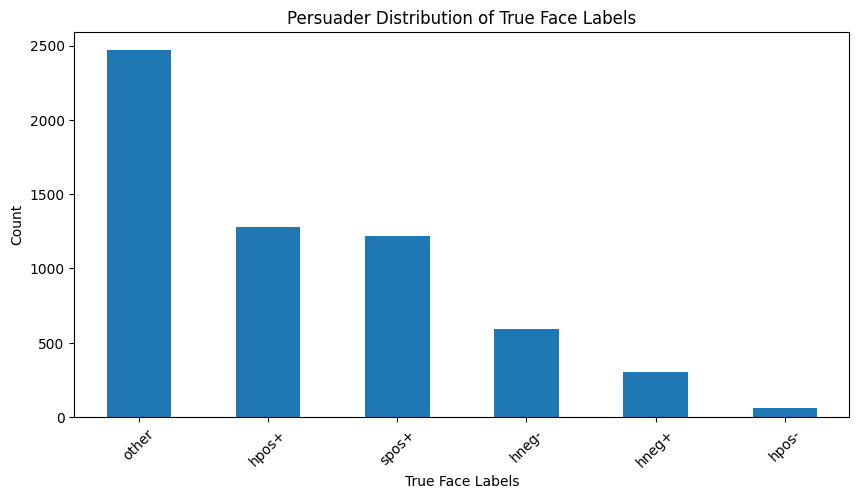

true_face
other    2468
hpos+    1277
spos+    1221
hneg-     593
hneg+     305
hpos-      62
Name: count, dtype: int64


In [14]:
ER_df = pd.DataFrame(ER_formatted_ds)
# Count occurrences of each true_face label
true_face_counts = ER_df['true_face'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 5))
true_face_counts.plot(kind='bar')
plt.title('Persuader Distribution of True Face Labels')
plt.xlabel('True Face Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Get unique values and their counts from the 'true_face' column in ER_ds
true_face_counts = ER_df['true_face'].value_counts()

# Convert the counts to a dictionary if needed
true_face_counts_dict = true_face_counts.to_dict()

# Print the unique values and their counts
print(true_face_counts)  # This will display the counts in descending order

### 3.1 Split the ER dataset into Train, Validation and Test sets

In [15]:
# Shuffle the dataset
ER_ds_shuffled = ER_formatted_ds.shuffle(seed=42)

# Split the dataset into training and testing sets
ER_train_ds, ER_test_ds = ER_formatted_ds.train_test_split(test_size=0.2).values()

# Split the dataset into training and validation sets (80% train, 20% validation)
ER_train_ds, ER_valid_ds = ER_formatted_ds.train_test_split(test_size=0.2).values()

# Display the sizes of the splits
print(f"Train size: {len(ER_train_ds)}, Validation size: {len(ER_valid_ds)}, Test size: {len(ER_test_ds)}")

print(ER_train_ds[0])
print(ER_valid_ds[0])
print(ER_test_ds[0])


Train size: 4740, Validation size: 1186, Test size: 1186
{'speaker': 'ER', 'dialogue': 'everyone at save the children really appreciates your donation', 'true_face_id': 2, 'true_face': 'hpos+'}
{'speaker': 'ER', 'dialogue': 'have you ever heard of save the children', 'true_face_id': 4, 'true_face': 'other'}
{'speaker': 'ER', 'dialogue': 'it would be really helpful if you donated to save the children fund', 'true_face_id': 1, 'true_face': 'hneg-'}


Now we need to assemble the training data. We need to create parallel lists of normalized content.

In [16]:
ER_train_tags = []
ER_train_labels = []
ER_train_texts = []

# Iterate over the formatted dataset
for item in ER_train_ds:
    ER_train_texts.append(item['dialogue'])  # Add the cleaned dialogue to train_text
    ER_train_labels.append(item['true_face_id'])  # Add the true_face ID to train_labels
    ER_train_tags.append(item['true_face'])  # Add the original true_face to train_tags (optional)

# Print out the sizes of the lists
print(f"Number of training samples: {len(ER_train_texts)}")
print(f"Number of training labels: {len(ER_train_labels)}")
print(f"Number of training tags: {len(ER_train_tags)}")

# Print the extracted lists (optional)
print(ER_train_texts[:15])
print(ER_train_tags[:15])  # Print first 5 elements for verification
print(ER_train_labels[:15])  # Print first 5 elements for verification

# Assuming ER_train_labels contains your training labels
class_labels = np.unique(ER_train_labels)
class_weights = class_weight.compute_class_weight('balanced', classes=class_labels, y=ER_train_labels)

# Convert class weights to a dictionary format
class_weight_dict = {i: class_weights[i] for i in range(len(class_labels))}


Number of training samples: 4740
Number of training labels: 4740
Number of training tags: 4740
['everyone at save the children really appreciates your donation', 'hi i hope you are well today', 'are you interested in donating', 'they provide whatever is needed', 'you can refer to save the childrens website to gather more information if you like to', 'its greati cant complain', 'especially when it is a legitimate charity that is dedicated to doing better', 'how much would you like to give', 'you care for children', 'im in arizona where it is very hot', 'there are lots of opportunities', 'im glad to know you agree with save the childrens values', 'the good thing is however that there are many organizations that we can support that help push for and ensure the rights of children and that they are given opportunities to succeed', 'too busy', 'or they would usually say maybe next time']
['hpos+', 'other', 'hneg-', 'spos+', 'other', 'other', 'other', 'hneg-', 'other', 'other', 'hpos+', 'hpos

In [17]:
ER_test_tags = []
ER_test_labels = []
ER_test_texts = []

# Iterate over the formatted dataset
for item in ER_test_ds:
    ER_test_texts.append(item['dialogue'])  # Add the cleaned dialogue to train_text
    ER_test_labels.append(item['true_face_id'])  # Add the true_face ID to train_labels
    ER_test_tags.append(item['true_face'])  # Add the original true_face to train_tags (optional)

# Print out the sizes of the lists
print(f"Number of test samples: {len(ER_test_texts)}")
print(f"Number of test labels: {len(ER_test_labels)}")
print(f"Number of test tags: {len(ER_test_tags)}")

# Print the extracted lists (optional)
print(ER_test_texts[:5])
print(ER_test_tags[:5])  # Print first 5 elements for verification
print(ER_test_labels[:5])  # Print first 5 elements for verification

Number of test samples: 1186
Number of test labels: 1186
Number of test tags: 1186
['it would be really helpful if you donated to save the children fund', 'they have been providing great services for kids for over 10 years', 'wow what is the specialty in your place', 'besides donate and visit url for more information', 'your donation will be directly deducted from your task payment']
['hneg-', 'spos+', 'other', 'other', 'hneg+']
[1, 5, 4, 4, 0]


We already have a set aside test set and a train set.  Let's explicitly set aside part of our training set for validation purposes.

In [18]:
ER_valid_tags = []
ER_valid_labels = []
ER_valid_texts = []

# Iterate over the formatted dataset
for item in ER_valid_ds:
    ER_valid_texts.append(item['dialogue'])  # Add the cleaned dialogue to train_text
    ER_valid_labels.append(item['true_face_id'])  # Add the true_face ID to train_labels
    ER_valid_tags.append(item['true_face'])  # Add the original true_face to train_tags (optional)

# Print out the sizes of the lists
print(f"Number of validation samples: {len(ER_valid_texts)}")
print(f"Number of validation labels: {len(ER_valid_labels)}")
print(f"Number of validation tags: {len(ER_valid_tags)}")

# Print the extracted lists (optional)
print(ER_valid_texts[:5])
print(ER_valid_tags[:5])  # Print first 5 elements for verification
print(ER_valid_labels[:5])  # Print first 5 elements for verification

Number of validation samples: 1186
Number of validation labels: 1186
Number of validation tags: 1186
['have you ever heard of save the children', 'im in the united states', 'it is very sweet', 'thank you for supporting the children of the world', 'you are such a good personality']
['other', 'other', 'hpos+', 'hpos+', 'hpos+']
[4, 4, 2, 2, 2]


In [19]:
def sort_dict_by_values(input_dict):

    # Create separate sorted lists of the integer tags and the associated labels
    # We'll need this for doing analysis of the results of our classifier

    items = list(input_dict.items())

    items.sort(key=lambda item: int(item[1]))  # Convert values to integers for sorting

    sorted_values = [item[1] for item in items]
    sorted_keys = [item[0] for item in items]

    return sorted_values, sorted_keys  # Return as a tuple

# Use the provided sorting function
sorted_values, sorted_keys = sort_dict_by_values(true_face_to_id)

# Display the results
print("Sorted True Face IDs:", sorted_values)
print("Sorted True Faces:", sorted_keys)
# The variable ''target_names'' stores all of the names of the labels.
target_names = sorted_keys
print(target_names)

Sorted True Face IDs: [0, 1, 2, 3, 4, 5]
Sorted True Faces: ['hneg+', 'hneg-', 'hpos+', 'hpos-', 'other', 'spos+']
['hneg+', 'hneg-', 'hpos+', 'hpos-', 'other', 'spos+']


Here are the variables we've already defined for the data:

* train_texts - an array of text strings for training
* test_texts - an array of text strings for testing
* valid texts - an array of text strings for validation
* train_labels - an array of integers representing the labels associated with train_texts
* test_labels - an array of integers representing the labels associated with test_texts
* valid_labels - an array of integers representing the labels associated with valid_texts
* target_names - an array of label strings that correspond to the integers in the *_labels arrays





### 4. Classification with a Fine Tuned DistilBert model


In [28]:
# Choose DistilBERT model checkpoint
distilbert_checkpoint = "distilbert-base-uncased"

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(distilbert_checkpoint)
distilbert_model = TFDistilBertModel.from_pretrained(distilbert_checkpoint)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [29]:
# Set the maximum sequence length
max_length = 200

In [30]:
# Convert texts to string if needed (as shown previously)
ER_train_texts = [str(text) for text in ER_train_texts]
ER_valid_texts = [str(text) for text in ER_valid_texts]
ER_test_texts = [str(text) for text in ER_test_texts]

# Tokenize the datasets for DistilBERT
ER_train_encodings = distilbert_tokenizer(
    ER_train_texts,
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='tf'
)
ER_valid_encodings = distilbert_tokenizer(
    ER_valid_texts,
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='tf'
)
ER_test_encodings = distilbert_tokenizer(
    ER_test_texts,
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='tf'
)

In [31]:
# Verify shapes
print(f"Train input_ids shape: {ER_train_encodings['input_ids'].shape}")
print(f"Validation input_ids shape: {ER_valid_encodings['input_ids'].shape}")
print(f"Test input_ids shape: {ER_test_encodings['input_ids'].shape}")

# Check the first record's input_ids for DistilBERT
print(ER_train_encodings['input_ids'][0])

Train input_ids shape: (4740, 200)
Validation input_ids shape: (1186, 200)
Test input_ids shape: (1186, 200)
tf.Tensor(
[  101  3071  2012  3828  1996  2336  2428  9120  2015  2115 13445   102
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
    

### 4. Create Model from DistilBERT

In [32]:
distilbert_checkpoint = "distilbert-base-uncased"

def create_distilbert_multiclass_model(checkpoint=distilbert_checkpoint,
                                       num_classes=6,
                                       hidden_size=201,
                                       dropout=0.3,
                                       learning_rate=0.00006):
    """
    Build a multiclass classification model using DistilBERT with a custom hidden layer.

    Arguments:
    - checkpoint: The pre-trained DistilBERT model checkpoint.
    - num_classes: Number of output classes for classification.
    - hidden_size: Size of the hidden layer.
    - dropout: Dropout rate for regularization.
    - learning_rate: Learning rate for optimization.

    Returns:
    - A compiled TensorFlow Keras model ready for training.
    """
    # Define the input layers for token IDs and attention masks
    input_ids = tf.keras.layers.Input(shape=(200,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(200,), dtype=tf.int32, name='attention_mask')

    # Load DistilBERT base model
    distilbert_model = TFAutoModel.from_pretrained(checkpoint)

    # Pass the inputs through DistilBERT
    distilbert_outputs = distilbert_model(input_ids=input_ids, attention_mask=attention_mask)
    # distilbert_outputs.last_hidden_state: (batch_size, sequence_length, hidden_dim)
    # Take the [CLS] token representation: distilbert_outputs.last_hidden_state[:, 0, :]
    cls_token = distilbert_outputs.last_hidden_state[:, 0, :]

    # Add a hidden dense layer
    hidden_layer = tf.keras.layers.Dense(hidden_size, activation='relu')(cls_token)

    # Apply dropout for regularization
    dropout_layer = tf.keras.layers.Dropout(dropout)(hidden_layer)

    # Classification layer for multi-class output, using softmax activation
    output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(dropout_layer)

    # Define the model
    classification_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output_layer)

    # Compile the model
    classification_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    return classification_model

# Create the DistilBERT model
distilbert_model = create_distilbert_multiclass_model(num_classes=6)

# Summarize the model
distilbert_model.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 200)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 200)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_distil_bert_model_2 (TF  TFBaseModelOutput(last_hid   6636288   ['input_ids[0][0]',           
 DistilBertModel)            den_state=(None, 200, 768)   0          'attention_mask[0][0]']      
                             , hidden_states=None, atte                                     

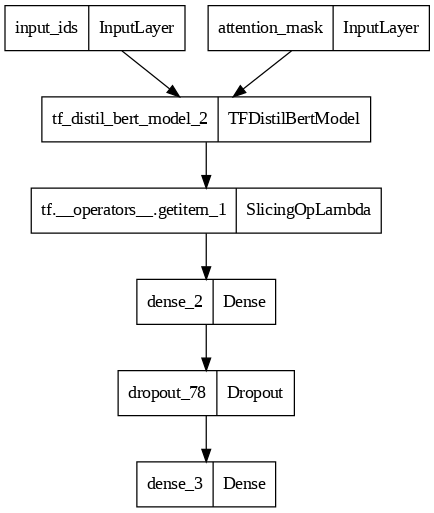

In [33]:
keras.utils.plot_model(distilbert_model, show_shapes=False, show_dtype=False, show_layer_names=True, dpi=90)

In [34]:
print("Unique labels in training set:", np.unique(ER_train_labels))
print("Unique labels in validation set:", np.unique(ER_valid_labels))

Unique labels in training set: [0 1 2 3 4 5]
Unique labels in validation set: [0 1 2 3 4 5]


### Train the Base Model

In [37]:
# Convert labels to a NumPy array if they are not already
ER_train_labels = np.array(ER_train_labels, dtype=np.int32)
ER_valid_labels = np.array(ER_valid_labels, dtype=np.int32)

# Train the DistilBERT model
distilbert_model_history = distilbert_model.fit(
    [ER_train_encodings["input_ids"], ER_train_encodings["attention_mask"]],
    ER_train_labels,
    validation_data=([ER_valid_encodings["input_ids"], ER_valid_encodings["attention_mask"]], ER_valid_labels),
    epochs=1,
    batch_size=8
)


593/593 [==============================] - 113s 191ms/step - loss: 0.3176 - accuracy: 0.8825 - val_loss: 0.9464 - val_accuracy: 0.6922


### 4.3 Class Weights to Mitigate Class Imbalance

In [38]:
# Compute class weights from the training labels
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(ER_train_labels),
    y=ER_train_labels
)

# Convert class weights to a dictionary
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Fit the DistilBERT model with class weights
distilbert_model_history = distilbert_model.fit(
    [ER_train_encodings["input_ids"], ER_train_encodings["attention_mask"]],
    ER_train_labels,
    validation_data=(
        [ER_valid_encodings["input_ids"], ER_valid_encodings["attention_mask"]],
        ER_valid_labels
    ),
    batch_size=32,
    epochs=5,
    class_weight=class_weight_dict  # Include class weights here
)


Epoch 1/5
149/149 [==============================] - 104s 646ms/step - loss: 0.2548 - accuracy: 0.9095 - val_loss: 1.1634 - val_accuracy: 0.6973
Epoch 2/5
149/149 [==============================] - 96s 645ms/step - loss: 0.1690 - accuracy: 0.9373 - val_loss: 1.2337 - val_accuracy: 0.7133
Epoch 3/5
149/149 [==============================] - 98s 660ms/step - loss: 0.1260 - accuracy: 0.9443 - val_loss: 1.4001 - val_accuracy: 0.6847
Epoch 4/5
149/149 [==============================] - 98s 660ms/step - loss: 0.1366 - accuracy: 0.9380 - val_loss: 1.3443 - val_accuracy: 0.6855
Epoch 5/5
149/149 [==============================] - 98s 660ms/step - loss: 0.1816 - accuracy: 0.9357 - val_loss: 1.3723 - val_accuracy: 0.6720


### 4.4 Evaluate model on the ER Test data

In [39]:
# Convert test labels to NumPy array if not already
ER_test_labels = np.array(ER_test_labels, dtype=np.int32)

# Evaluate the DistilBERT model on the test dataset
score = distilbert_model.evaluate(
    [ER_test_encodings["input_ids"], ER_test_encodings["attention_mask"]],
    ER_test_labels
)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Run predictions for the test dataset
predictions = distilbert_model.predict(
    [ER_test_encodings["input_ids"], ER_test_encodings["attention_mask"]]
)


38/38 [==============================] - 8s 204ms/step - loss: 0.4483 - accuracy: 0.8887
Test loss: 0.4483327567577362
Test accuracy: 0.8887014985084534
38/38 [==============================] - 11s 205ms/step


### 4.5 Generate Classification Report

In [40]:
# Assuming `predictions` is the output from distilbert_model.predict(...)
print("Predictions shape:", predictions.shape)

# Get the highest probability class for each prediction
predicted_classes = tf.argmax(predictions, axis=-1).numpy()

# Generate the classification report
print(classification_report(ER_test_labels, predicted_classes, target_names=target_names))


Predictions shape: (1186, 6)
              precision    recall  f1-score   support

       hneg+       0.69      0.92      0.79        64
       hneg-       0.90      0.96      0.93        99
       hpos+       0.87      0.90      0.89       279
       hpos-       0.50      0.64      0.56        14
       other       0.96      0.84      0.89       502
       spos+       0.88      0.96      0.92       228

    accuracy                           0.89      1186
   macro avg       0.80      0.87      0.83      1186
weighted avg       0.90      0.89      0.89      1186



In [41]:
# Compute confusion matrix
cm = tf.math.confusion_matrix(ER_test_labels, predicted_classes)
cm = cm / cm.numpy().sum(axis=1)[:, tf.newaxis]


### 4.6 Plot Confusion Matrix

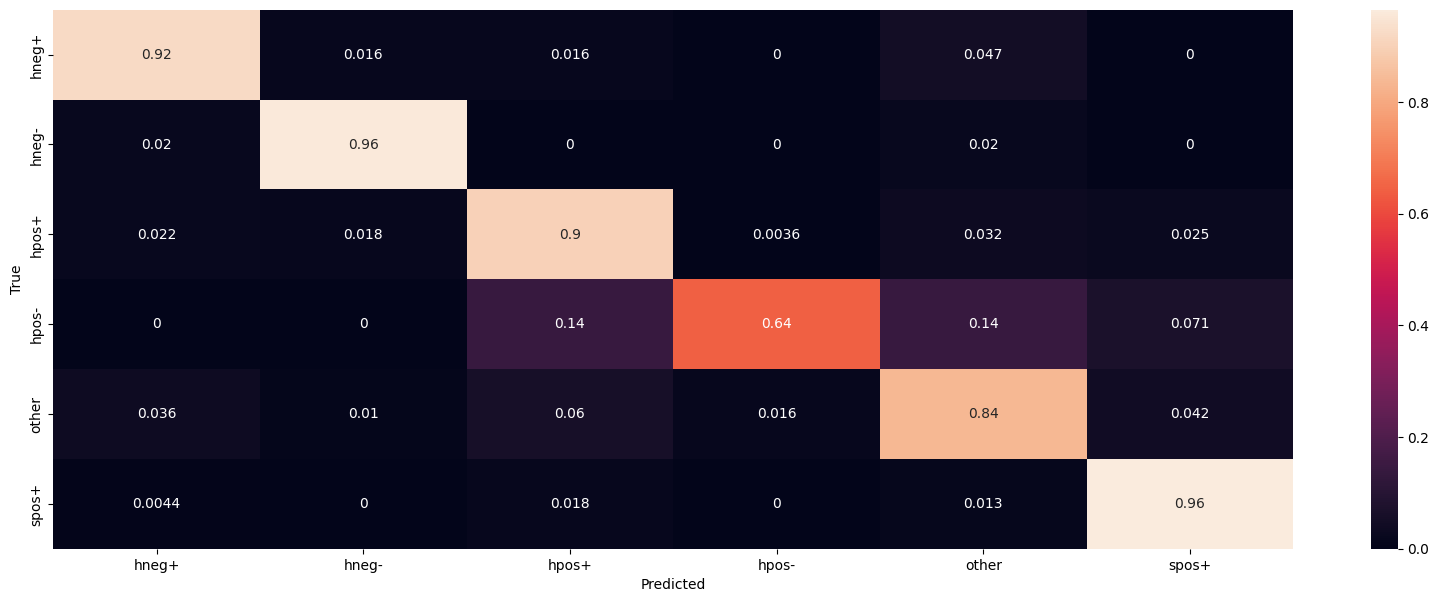

In [42]:
# Plot the confusion matrix
plt.figure(figsize=(20,7))
sns.heatmap(
    cm, annot=True,
    xticklabels=target_names,
    yticklabels=target_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### 5. Hyperparameter tuning

We have pursued incremental hyperparameter tuning approach in code form. This is not a fully automated process, but a pattern you can follow. The idea is:

* Initial Narrow Search: Start with a small range of
values for one or two key hyperparameters (e.g., learning rate).
* Short Training Runs: Use fewer epochs or a subset of the data to quickly gauge performance.
* Early Stopping: Implement early stopping to end poor runs early.
* Iterative Refinement: After evaluating the initial results, narrow down the hyperparameters and run another round.

In [44]:
# Hyperparameters we want to tune:
learning_rates = [1e-5, 3e-5, 6e-5, 8e-5]   # Start with a small set
dropout_rates = [0.1, 0.3, 0.5]                  # Start small
epochs = 1                                  # Use fewer epochs initially
batch_size = 16                             # Maybe smaller batch sizes for quick tests

# Early stopping callback to stop runs that aren't improving
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=1,  # Stop if no improvement after 1 epoch
    restore_best_weights=True
)

results = []

# Initial incremental search
for lr, dr in itertools.product(learning_rates, dropout_rates):
    # Create the model with current hyperparameters
    distilbert_model = create_distilbert_multiclass_model(
        checkpoint="distilbert-base-uncased",
        num_classes=6,
        hidden_size=201,
        dropout=dr,
        learning_rate=lr
    )

    print(f"Testing LR={lr}, Dropout={dr}")

    start_time = time.time()
    # Train briefly on the full dataset or possibly a subset if needed
    history = distilbert_model.fit(
        [ER_train_encodings["input_ids"], ER_train_encodings["attention_mask"]],
        ER_train_labels,
        validation_data=(
            [ER_valid_encodings["input_ids"], ER_valid_encodings["attention_mask"]],
            ER_valid_labels
        ),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weight_dict,
        callbacks=[early_stopping],
        verbose=1
    )
    train_time = time.time() - start_time

    # Evaluate on validation set
    val_loss, val_acc = distilbert_model.evaluate(
        [ER_valid_encodings["input_ids"], ER_valid_encodings["attention_mask"]],
        ER_valid_labels,
        verbose=0
    )

    results.append((lr, dr, val_loss, val_acc, train_time))
    print(f"Done: LR={lr}, DR={dr}, Val_Acc={val_acc}, Training Time={train_time:.2f}s")



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=1e-05, Dropout=0.1
297/297 [==============================] - 134s 359ms/step - loss: 1.3459 - accuracy: 0.4335 - val_loss: 1.0457 - val_accuracy: 0.6046
Done: LR=1e-05, DR=0.1, Val_Acc=0.6045531034469604, Training Time=159.76s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=1e-05, Dropout=0.3
297/297 [==============================] - 136s 365ms/step - loss: 1.3583 - accuracy: 0.4568 - val_loss: 1.0959 - val_accuracy: 0.5835
Done: LR=1e-05, DR=0.3, Val_Acc=0.5834738612174988, Training Time=136.19s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=1e-05, Dropout=0.5
297/297 [==============================] - 134s 362ms/step - loss: 1.4248 - accuracy: 0.3692 - val_loss: 1.2889 - val_accuracy: 0.4806
Done: LR=1e-05, DR=0.5, Val_Acc=0.4806070923805237, Training Time=133.65s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=3e-05, Dropout=0.1
297/297 [==============================] - 135s 360ms/step - loss: 1.1809 - accuracy: 0.5171 - val_loss: 1.0091 - val_accuracy: 0.6121
Done: LR=3e-05, DR=0.1, Val_Acc=0.6121416687965393, Training Time=135.47s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=3e-05, Dropout=0.3
297/297 [==============================] - 132s 359ms/step - loss: 1.2833 - accuracy: 0.4768 - val_loss: 1.1733 - val_accuracy: 0.5354
Done: LR=3e-05, DR=0.3, Val_Acc=0.5354131460189819, Training Time=160.79s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=3e-05, Dropout=0.5
297/297 [==============================] - 135s 359ms/step - loss: 1.3227 - accuracy: 0.4506 - val_loss: 1.1034 - val_accuracy: 0.6248
Done: LR=3e-05, DR=0.5, Val_Acc=0.6247891783714294, Training Time=162.93s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=6e-05, Dropout=0.1
297/297 [==============================] - 134s 365ms/step - loss: 1.2261 - accuracy: 0.5015 - val_loss: 1.1617 - val_accuracy: 0.5616
Done: LR=6e-05, DR=0.1, Val_Acc=0.5615514516830444, Training Time=134.14s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=6e-05, Dropout=0.3
297/297 [==============================] - 136s 360ms/step - loss: 1.2654 - accuracy: 0.4935 - val_loss: 1.1385 - val_accuracy: 0.5455
Done: LR=6e-05, DR=0.3, Val_Acc=0.5455312132835388, Training Time=136.06s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=6e-05, Dropout=0.5
297/297 [==============================] - 135s 366ms/step - loss: 1.3213 - accuracy: 0.4709 - val_loss: 1.1132 - val_accuracy: 0.5632
Done: LR=6e-05, DR=0.5, Val_Acc=0.5632377862930298, Training Time=134.89s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=8e-05, Dropout=0.1
297/297 [==============================] - 138s 376ms/step - loss: 1.2465 - accuracy: 0.5080 - val_loss: 0.9821 - val_accuracy: 0.6113
Done: LR=8e-05, DR=0.1, Val_Acc=0.6112985014915466, Training Time=137.75s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=8e-05, Dropout=0.3
297/297 [==============================] - 133s 360ms/step - loss: 1.2700 - accuracy: 0.5118 - val_loss: 1.1340 - val_accuracy: 0.5506
Done: LR=8e-05, DR=0.3, Val_Acc=0.5505902171134949, Training Time=161.00s


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Testing LR=8e-05, Dropout=0.5
297/297 [==============================] - 134s 367ms/step - loss: 1.3511 - accuracy: 0.4751 - val_loss: 1.1508 - val_accuracy: 0.5649
Done: LR=8e-05, DR=0.5, Val_Acc=0.5649241209030151, Training Time=160.49s


In [52]:
# After initial hyperparameter search:
best_lr = 6e-5
best_dr = 0.3
#best_config = max(results, key=lambda x: x[3])  # x[3] is val_acc
#best_lr, best_dr = best_config[0], best_config[1]
print(f"Best initial config: LR={best_lr}, Dropout={best_dr}")


Best initial config: LR=6e-05, Dropout=0.3


In [55]:
# Now train a final model with the best found hyperparameters
# You can increase epochs or batch_size here for a more thorough training run if desired
final_epochs = 300
final_batch_size = 32

final_model = create_distilbert_multiclass_model(
    checkpoint="distilbert-base-uncased",
    num_classes=6,
    hidden_size=201,
    dropout=best_dr,
    learning_rate=best_lr
)

# Early stopping callback to stop runs that aren't improving
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop if no improvement after 5 epochs
    restore_best_weights=True
)

print(f"Training final model with LR={best_lr}, Dropout={best_dr}")
history = final_model.fit(
    [ER_train_encodings["input_ids"], ER_train_encodings["attention_mask"]],
    ER_train_labels,
    validation_data=(
        [ER_valid_encodings["input_ids"], ER_valid_encodings["attention_mask"]],
        ER_valid_labels
    ),
    epochs=final_epochs,
    batch_size=final_batch_size,
    class_weight=class_weight_dict,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate final model on validation set
val_loss, val_acc = final_model.evaluate(
    [ER_valid_encodings["input_ids"], ER_valid_encodings["attention_mask"]],
    ER_valid_labels,
    verbose=0
)

print(f"Final model performance - Val Loss: {val_loss}, Val Acc: {val_acc}")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Training final model with LR=6e-05, Dropout=0.3
Epoch 1/300
149/149 [==============================] - 133s 683ms/step - loss: 1.2720 - accuracy: 0.4732 - val_loss: 1.0963 - val_accuracy: 0.5750
Epoch 2/300
149/149 [==============================] - 97s 649ms/step - loss: 0.7682 - accuracy: 0.6517 - val_loss: 0.9931 - val_accuracy: 0.6518
Epoch 3/300
149/149 [==============================] - 97s 651ms/step - loss: 0.5288 - accuracy: 0.7386 - val_loss: 1.2861 - val_accuracy: 0.5995
Epoch 4/300
149/149 [==============================] - 99s 664ms/step - loss: 0.5622 - accuracy: 0.7295 - val_loss: 0.9288 - val_accuracy: 0.6922
Epoch 5/300
149/149 [==============================] - 99s 662ms/step - loss: 0.2950 - accuracy: 0.8346 - val_loss: 0.9957 - val_accuracy: 0.7024
Epoch 6/300
149/149 [==============================] - 98s 661ms/step - loss: 0.2096 - accuracy: 0.8785 - val_loss: 1.0870 - val_accuracy: 0.6965
Epoch 7/300
149/149 [==============================] - 99s 661ms/step - los

### 5.5 Classification Report and Confusion Matix of final best fine tuned model after hyperparameter tuning

38/38 [==============================] - 8s 204ms/step
Predictions shape: (1186, 6)
              precision    recall  f1-score   support

       hneg+       0.65      0.92      0.76        64
       hneg-       0.89      0.92      0.91        99
       hpos+       0.81      0.86      0.83       279
       hpos-       0.37      0.71      0.49        14
       other       0.95      0.75      0.84       502
       spos+       0.80      0.95      0.87       228

    accuracy                           0.84      1186
   macro avg       0.74      0.85      0.78      1186
weighted avg       0.86      0.84      0.84      1186



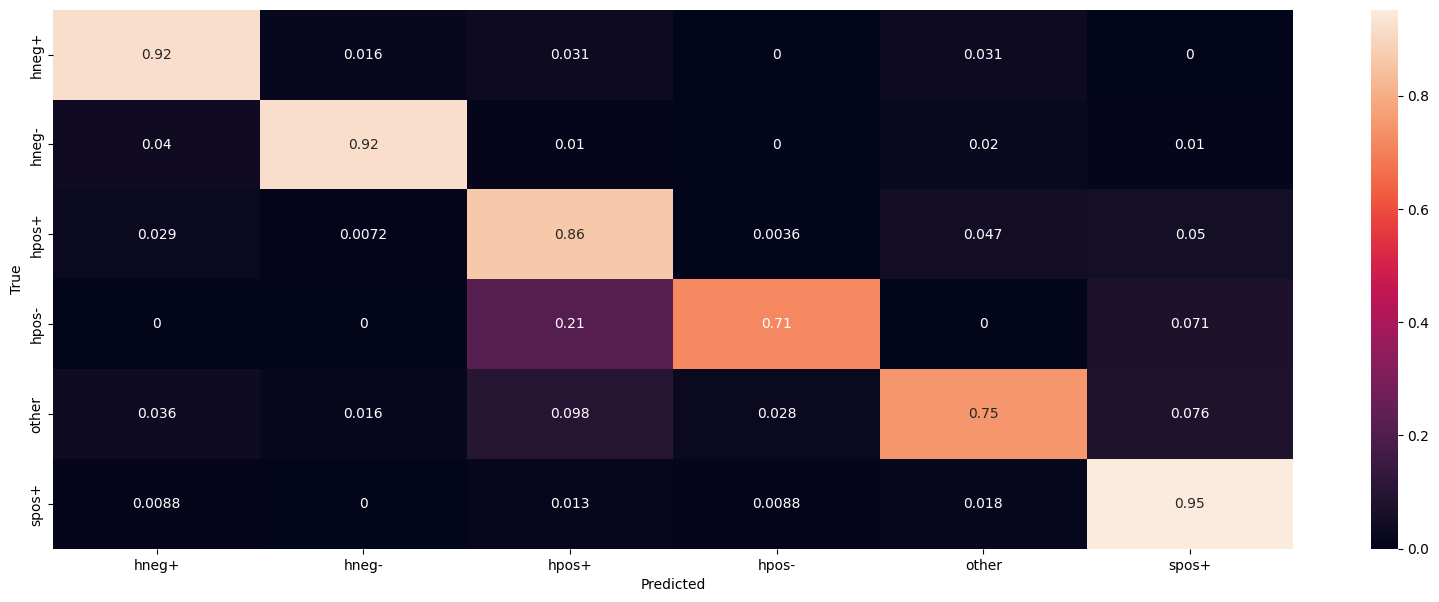

In [57]:
# Use the final model to predict on the test dataset
predictions = final_model.predict([ER_test_encodings["input_ids"], ER_test_encodings["attention_mask"]])

# Assuming `predictions` is the output from distilbert_model.predict(...)
print("Predictions shape:", predictions.shape)

# Extract predicted classes by taking the argmax
predicted_classes = tf.argmax(predictions, axis=-1).numpy()

# Print classification report
print(classification_report(ER_test_labels, predicted_classes, target_names=target_names))

# Compute confusion matrix
cm = tf.math.confusion_matrix(ER_test_labels, predicted_classes)
cm = cm / cm.numpy().sum(axis=1)[:, tf.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(20,7))
sns.heatmap(
    cm, annot=True,
    xticklabels=target_names,
    yticklabels=target_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### 6. Format and Explore the EE Dataset

In [58]:
# Function to clean dialogue
def clean_dialogue(dialogue):
    if isinstance(dialogue, str):  # Ensure the input is a string
        # Lowercase
        dialogue = dialogue.lower()
        # Remove punctuation
        dialogue = re.sub(r'[^\w\s]', '', dialogue)
        # Strip whitespace
        dialogue = dialogue.strip()
        return dialogue
    else:
        return ""  # Return an empty string or handle as you prefer

cleaned_data = []
EE_formatted_ds = []
true_face_labels = set()  # To collect unique true_face labels

# Use iterrows() to iterate through the DataFrame
for index, row in EE_dataset.iterrows():
    speaker = row['speaker']
    utterance = row['utterance']
    true_face = row['true_face']

    # Clean the utterance
    cleaned_utterance = clean_dialogue(utterance)

    # Collect unique true_face labels
    true_face_labels.add(true_face)

    # Append the speaker and cleaned utterance to the formatted data
    EE_formatted_ds.append({
        'speaker': f"{speaker}",
        'dialogue': cleaned_utterance,  # Store cleaned dialogue
        'true_face': true_face  # Keep original true_face for now
    })

# Create a mapping from true_face labels to IDs
sorted_labels = sorted(label for label in true_face_labels)

# Create a mapping from sorted labels to IDs
true_face_to_id = {label: idx for idx, label in enumerate(sorted_labels)}

# Create a new Dataset from the formatted data and convert labels to IDs
EE_formatted_ds = Dataset.from_dict({
    'speaker': [entry['speaker'] for entry in EE_formatted_ds],
    'dialogue': [entry['dialogue'] for entry in EE_formatted_ds],
    'true_face_id': [true_face_to_id[entry['true_face']] for entry in EE_formatted_ds],  # Converts true_face to ID
    'true_face': [entry['true_face'] for entry in EE_formatted_ds]  # Keeps the original true_face
})

# Display first 100 entries of the formatted dataset
print(EE_formatted_ds[:5])
# Print the mapping of true_face labels to IDs
print(true_face_to_id)

{'speaker': ['EE', 'EE', 'EE', 'EE', 'EE'], 'dialogue': ['i think i have once before in a grocery store i believe', 'sure go ahead', 'are they a non profit organization', 'oh wow shocking news', 'do you know how many children have been helped due to this organization'], 'true_face_id': [1, 1, 0, 1, 0], 'true_face': ['hpos+', 'hpos+', 'hneg-', 'hpos+', 'hneg-']}
{'hneg-': 0, 'hpos+': 1, 'hpos-': 2, 'other': 3, 'sneg+': 4, 'spos+': 5, 'spos-': 6}


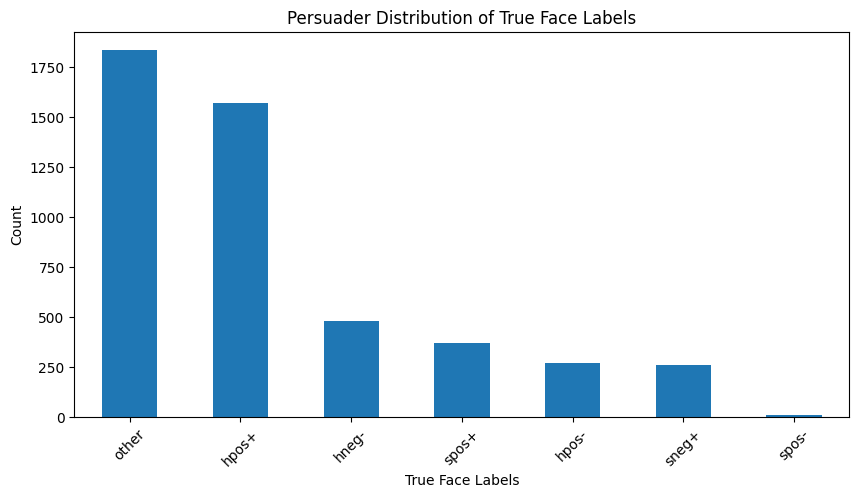

true_face
other    1832
hpos+    1567
hneg-     480
spos+     368
hpos-     272
sneg+     259
spos-      12
Name: count, dtype: int64


In [59]:
EE_df = pd.DataFrame(EE_formatted_ds)
# Count occurrences of each true_face label
true_face_counts = EE_df['true_face'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 5))
true_face_counts.plot(kind='bar')
plt.title('Persuader Distribution of True Face Labels')
plt.xlabel('True Face Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Get unique values and their counts from the 'true_face' column in ER_ds
true_face_counts = EE_df['true_face'].value_counts()

# Convert the counts to a dictionary if needed
true_face_counts_dict = true_face_counts.to_dict()

# Print the unique values and their counts
print(true_face_counts)  # This will display the counts in descending order

In [60]:
# Shuffle the dataset
EE_ds_shuffled = EE_formatted_ds.shuffle(seed=42)

# Split the dataset into training and testing sets
EE_train_ds, EE_test_ds = EE_formatted_ds.train_test_split(test_size=0.2).values()

# Split the dataset into training and validation sets (80% train, 20% validation)
EE_train_ds, EE_valid_ds = EE_formatted_ds.train_test_split(test_size=0.2).values()

# Display the sizes of the splits
print(f"Train size: {len(EE_train_ds)}, Validation size: {len(EE_valid_ds)}, Test size: {len(EE_test_ds)}")

print(EE_train_ds[0])
print(EE_valid_ds[0])
print(EE_test_ds[0])

Train size: 3832, Validation size: 958, Test size: 958
{'speaker': 'EE', 'dialogue': 'its all good bud', 'true_face_id': 1, 'true_face': 'hpos+'}
{'speaker': 'EE', 'dialogue': 'i think that what is happening with save the children is a good idea', 'true_face_id': 1, 'true_face': 'hpos+'}
{'speaker': 'EE', 'dialogue': 'hi have you ever donated to a childrens charity before', 'true_face_id': 0, 'true_face': 'hneg-'}


In [61]:
EE_train_tags = []
EE_train_labels = []
EE_train_texts = []

# Iterate over the formatted dataset
for item in EE_train_ds:
    EE_train_texts.append(item['dialogue'])  # Add the cleaned dialogue to train_text
    EE_train_labels.append(item['true_face_id'])  # Add the true_face ID to train_labels
    EE_train_tags.append(item['true_face'])  # Add the original true_face to train_tags (optional)

# Print out the sizes of the lists
print(f"Number of training samples: {len(EE_train_texts)}")
print(f"Number of training labels: {len(EE_train_labels)}")
print(f"Number of training tags: {len(EE_train_tags)}")

# Print the extracted lists (optional)
print(EE_train_texts[:15])
print(EE_train_tags[:15])  # Print first 5 elements for verification
print(EE_train_labels[:15])  # Print first 5 elements for verification

Number of training samples: 3832
Number of training labels: 3832
Number of training tags: 3832
['its all good bud', 'yes i also like what they do', 'most people take for granted what they have in their lives while there are so many thousands who do not even have the basic necessities', 'that is wonderful', 'what did you get him', 'what do you think', 'hello i am doing good alright lets get started', 'absolutely', 'yes i support a few causes that i personally believe in very much', 'do you volunteer any where', 'id like to learn more information', 'hi i currently have a childrens charity that i sponsor', 'can i donate another amount', 'very cool i have heard of them but never looked into them too closely', 'yeah i did']
['hpos+', 'hpos+', 'other', 'hpos+', 'other', 'other', 'hpos+', 'hpos+', 'spos+', 'other', 'other', 'spos+', 'spos+', 'hpos+', 'spos+']
[1, 1, 3, 1, 3, 3, 1, 1, 5, 3, 3, 5, 5, 1, 5]


In [62]:
EE_test_tags = []
EE_test_labels = []
EE_test_texts = []

# Iterate over the formatted dataset
for item in EE_test_ds:
    EE_test_texts.append(item['dialogue'])  # Add the cleaned dialogue to train_text
    EE_test_labels.append(item['true_face_id'])  # Add the true_face ID to train_labels
    EE_test_tags.append(item['true_face'])  # Add the original true_face to train_tags (optional)

# Print out the sizes of the lists
print(f"Number of training samples: {len(EE_test_texts)}")
print(f"Number of training labels: {len(EE_test_labels)}")
print(f"Number of training tags: {len(EE_test_tags)}")

# Print the extracted lists (optional)
print(EE_test_texts[:15])
print(EE_test_tags[:15])  # Print first 5 elements for verification
print(EE_test_labels[:15])  # Print first 5 elements for verification



Number of training samples: 958
Number of training labels: 958
Number of training tags: 958
['hi have you ever donated to a childrens charity before', 'i have not made a donation recently', 'i really appreciate your willingness to go out on a limb', 'so childrens charity then', 'of course i could do so from my paypal', 'lets both do 15 but split among ronald mcdonald and save the children', 'one last question  are all members who help volunteer based', 'do you have personal experience', 'well that is really great', 'alright i will donate', 'shelter', 'oh yep', 'yes im not sure either but it just kills me to know there are ids suffering', 'sure tell me more about how its used', 'you are welcome anything for the children i say']
['hneg-', 'other', 'other', 'other', 'hpos+', 'hpos+', 'hneg-', 'other', 'hpos+', 'hpos+', 'hneg-', 'other', 'other', 'other', 'hpos+']
[0, 3, 3, 3, 1, 1, 0, 3, 1, 1, 0, 3, 3, 3, 1]


In [63]:
EE_valid_tags = []
EE_valid_labels = []
EE_valid_texts = []

# Iterate over the formatted dataset
for item in EE_valid_ds:
    EE_valid_texts.append(item['dialogue'])  # Add the cleaned dialogue to train_text
    EE_valid_labels.append(item['true_face_id'])  # Add the true_face ID to train_labels
    EE_valid_tags.append(item['true_face'])  # Add the original true_face to train_tags (optional)

# Print out the sizes of the lists
print(f"Number of training samples: {len(EE_valid_texts)}")
print(f"Number of training labels: {len(EE_valid_labels)}")
print(f"Number of training tags: {len(EE_valid_tags)}")

# Print the extracted lists (optional)
print(EE_valid_texts[:15])
print(EE_valid_tags[:15])  # Print first 5 elements for verification
print(EE_valid_labels[:15])  # Print first 5 elements for verification

Number of training samples: 958
Number of training labels: 958
Number of training tags: 958
['i think that what is happening with save the children is a good idea', 'how can someone get involved and help out with this charity', 'you take care and have a good day', 'first is your reward contingent on my donating', 'save the children', 'no i am sorry again', 'oh cool', 'i have not but there are other charities i like to participate in', 'i dont know much about their events', 'hi tommy im cassidy', 'glad you took your time', 'no to be honest i am doing this task to save up extra money for myself', 'what do they do', 'same to you', 'what is save the children']
['hpos+', 'other', 'other', 'hneg-', 'hpos+', 'sneg+', 'hpos+', 'spos+', 'other', 'other', 'other', 'sneg+', 'other', 'other', 'hpos-']
[1, 3, 3, 0, 1, 4, 1, 5, 3, 3, 3, 4, 3, 3, 2]


In [64]:
def sort_dict_by_values(input_dict):

    # Create separate sorted lists of the integer tags and the associated labels
    # We'll need this for doing analysis of the results of our classifier

    items = list(input_dict.items())

    items.sort(key=lambda item: int(item[1]))  # Convert values to integers for sorting

    sorted_values = [item[1] for item in items]
    sorted_keys = [item[0] for item in items]

    return sorted_values, sorted_keys  # Return as a tuple

# Use the provided sorting function
sorted_values, sorted_keys = sort_dict_by_values(true_face_to_id)

# Display the results
print("Sorted True Face IDs:", sorted_values)
print("Sorted True Faces:", sorted_keys)
# The variable ''target_names'' stores all of the names of the labels.
target_names = sorted_keys
print(target_names)

Sorted True Face IDs: [0, 1, 2, 3, 4, 5, 6]
Sorted True Faces: ['hneg-', 'hpos+', 'hpos-', 'other', 'sneg+', 'spos+', 'spos-']
['hneg-', 'hpos+', 'hpos-', 'other', 'sneg+', 'spos+', 'spos-']


Here are the variables we've already defined for the data:

* train_texts - an array of text strings for training
* test_texts - an array of text strings for testing
* valid texts - an array of text strings for validation
* train_labels - an array of integers representing the labels associated with train_texts
* test_labels - an array of integers representing the labels associated with test_texts
* valid_labels - an array of integers representing the labels associated with valid_texts
* target_names - an array of label strings that correspond to the integers in the *_labels arrays


### Tokenize and Prepare Text Data for DistilBERT Model Training

In [69]:
# Convert texts to string if needed (as shown previously)
EE_train_texts = [str(text) for text in EE_train_texts]
EE_valid_texts = [str(text) for text in EE_valid_texts]
EE_test_texts = [str(text) for text in EE_test_texts]

# Tokenize the datasets for DistilBERT
EE_train_encodings = distilbert_tokenizer(
    EE_train_texts,
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='tf'
)
EE_valid_encodings = distilbert_tokenizer(
    EE_valid_texts,
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='tf'
)
EE_test_encodings = distilbert_tokenizer(
    EE_test_texts,
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='tf'
)

In [70]:
print(f"Train input_ids shape: {EE_train_encodings['input_ids'].shape}")
print(f"Validation input_ids shape: {EE_valid_encodings['input_ids'].shape}")
print(f"Test input_ids shape: {EE_test_encodings['input_ids'].shape}")

Train input_ids shape: (3832, 200)
Validation input_ids shape: (958, 200)
Test input_ids shape: (958, 200)


In [71]:
# Convert labels to NumPy arrays if not done already
EE_train_labels = np.array(EE_train_labels, dtype=np.int32)
EE_valid_labels = np.array(EE_valid_labels, dtype=np.int32)
EE_test_labels = np.array(EE_test_labels, dtype=np.int32)

In [72]:
# Compute class weights for EE dataset
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(EE_train_labels),
    y=EE_train_labels
)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

In [73]:
distilbert_EE_model = create_distilbert_multiclass_model(
    checkpoint=distilbert_checkpoint,
    num_classes=7,
    hidden_size=201,
    dropout=0.3,
    learning_rate=6e-5  # You can use the best found LR and DR if known, or start with a baseline
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [75]:
# Train the DistilBERT model on EE dataset using class weights
distilbert_EE_model_history = distilbert_EE_model.fit(
    [EE_train_encodings["input_ids"], EE_train_encodings["attention_mask"]],
    EE_train_labels,
    validation_data=([EE_valid_encodings["input_ids"], EE_valid_encodings["attention_mask"]], EE_valid_labels),
    batch_size=32,
    epochs=15,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/15
120/120 [==============================] - 78s 652ms/step - loss: 0.1901 - accuracy: 0.8703 - val_loss: 1.3133 - val_accuracy: 0.6378
Epoch 2/15
120/120 [==============================] - 81s 680ms/step - loss: 0.1615 - accuracy: 0.8901 - val_loss: 1.4242 - val_accuracy: 0.6514
Epoch 3/15
120/120 [==============================] - 82s 680ms/step - loss: 0.1337 - accuracy: 0.9149 - val_loss: 1.5797 - val_accuracy: 0.6138
Epoch 4/15
120/120 [==============================] - 78s 648ms/step - loss: 0.0977 - accuracy: 0.9319 - val_loss: 1.5991 - val_accuracy: 0.6597
Epoch 5/15
120/120 [==============================] - 78s 647ms/step - loss: 0.0859 - accuracy: 0.9442 - val_loss: 1.6916 - val_accuracy: 0.6294
Epoch 6/15
120/120 [==============================] - 82s 680ms/step - loss: 0.0863 - accuracy: 0.9400 - val_loss: 2.0035 - val_accuracy: 0.6106
Epoch 7/15
120/120 [==============================] - 81s 679ms/step - loss: 0.1078 - accuracy: 0.9264 - val_loss: 1.7562 - val_ac

In [76]:
# Evaluate on the EE test dataset
test_loss, test_acc = distilbert_EE_model.evaluate(
    [EE_test_encodings["input_ids"], EE_test_encodings["attention_mask"]],
    EE_test_labels,
    verbose=0
)
print('EE Test loss:', test_loss)
print('EE Test accuracy:', test_acc)

EE Test loss: 0.44126012921333313
EE Test accuracy: 0.8924843668937683


In [77]:
# Predict on the EE test dataset
predictions = distilbert_EE_model.predict(
    [EE_test_encodings["input_ids"], EE_test_encodings["attention_mask"]]
)

# Convert predictions to class indices
predicted_classes = tf.argmax(predictions, axis=-1).numpy()

# Generate classification report
print(classification_report(EE_test_labels, predicted_classes, target_names=target_names))


30/30 [==============================] - 11s 205ms/step
              precision    recall  f1-score   support

       hneg-       0.81      0.91      0.86       100
       hpos+       0.94      0.91      0.92       317
       hpos-       0.72      0.84      0.78        50
       other       0.93      0.88      0.90       360
       sneg+       0.88      0.86      0.87        50
       spos+       0.81      0.94      0.87        78
       spos-       0.75      1.00      0.86         3

    accuracy                           0.89       958
   macro avg       0.84      0.90      0.87       958
weighted avg       0.90      0.89      0.89       958



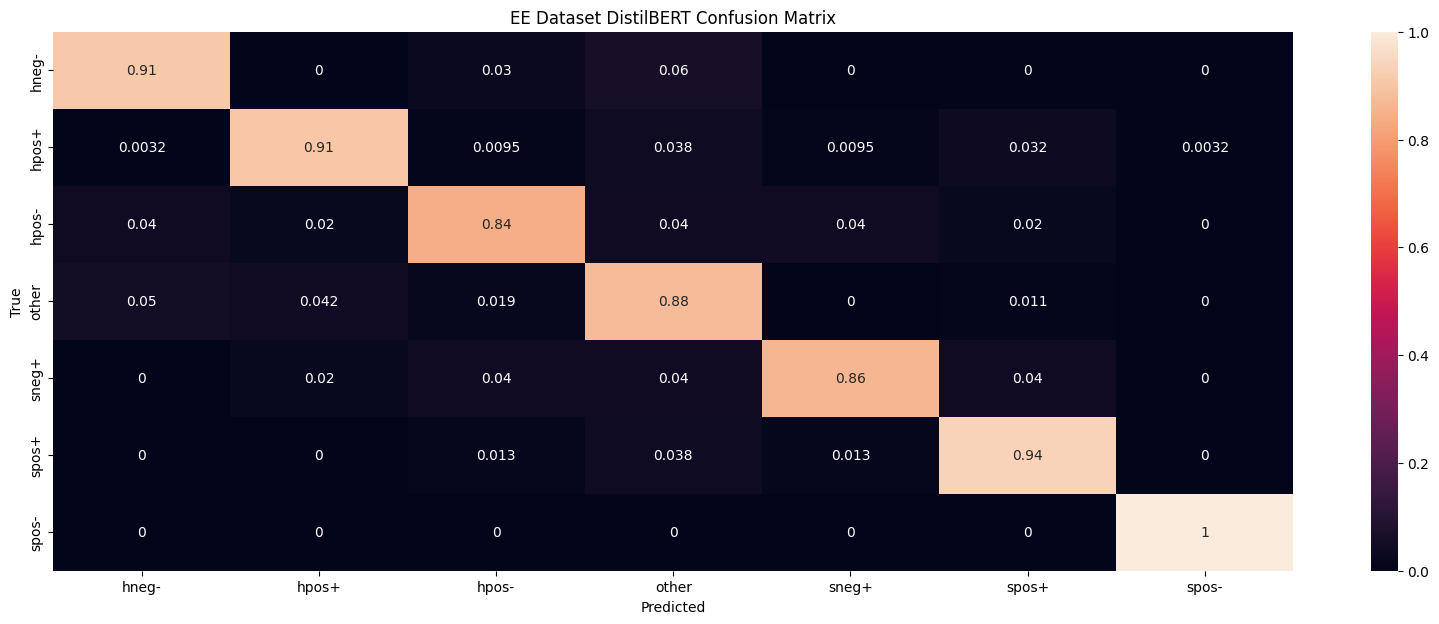

In [78]:
# Compute confusion matrix
cm = tf.math.confusion_matrix(EE_test_labels, predicted_classes)
cm = cm / cm.numpy().sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(20,7))
sns.heatmap(
    cm, annot=True,
    xticklabels=target_names,
    yticklabels=target_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("EE Dataset DistilBERT Confusion Matrix")
plt.show()